# HW3 

# Set Up

In [31]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# We need to import key libraries that we're going to use.  
# For now this is just numpy, which is our linear algebra library
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [32]:
# to make this notebook's output stable across runs, we are going to see the random seed
np.random.seed(42)

In [33]:
# To plot pretty figures

%matplotlib inline 
# This command figures show up in the notebook.  It's a "magic" command...
# Typically, this now happens by default so it is often an unnecessary command, but is good for standardization.
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [34]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "hw3"

In [35]:
# makes the directory if it doesn't exist.
import os
if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory didn\'t exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.') 

Figure directory exists.


In [36]:
 #a simple defined helper function.
def savepdf(fig,name):
    fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.pdf')

# P 2

In [42]:
from sklearn import metrics

In [43]:
ydf=pd.read_csv('hw2/hw2_problem_4_y_blind.csv')
y_blind=np.array(ydf.values[:,1],dtype=np.float64)
print(y_blind)

[ 1.17155755  0.3200264  -3.63249813  2.80132312 -0.03278291  0.26844134
 -1.99872843 -1.45079839  1.2004741   0.71794692  1.64923857 -1.67039533
  0.12599072 -0.30042517  2.26822609 -1.06737676 -1.9932436   0.588105
 -0.06499651  0.70166146  1.83867049  1.12949067  0.47364405 -3.49537258
 -1.67451767  3.28910919 -1.36325048 -0.29870539 -0.39788303  0.49554377
  0.91530936  1.53520328  0.55095592  0.42500646 -3.18862805  0.52730994
 -0.00795183  0.07774044  0.7435962  -0.39504501  0.58107546  1.47372284
 -2.07019006 -0.95262771  1.09023038 -1.21290956  0.85924812 -2.55237629
  2.2827092   0.07707144]


In [44]:
ydf2=pd.read_csv('answers/hw2_problem_4_y_blind_predicted.csv')
y_predict=np.array(ydf2.values[:,1],dtype=np.float64)
mse=mean_squared_error(y_true=y_blind,y_pred=y_predict)

print(mse)

1.08470454253


In [45]:
y_blind_df=pd.read_csv('hw2/hw2_problem_5_y_blind.csv')
y_blind=np.array(y_blind_df.values[:,1],dtype=np.float64)

In [46]:
ydf2=pd.read_csv('answers/hw2_problem_5_y_blind_predicted.csv')
y_predict2=np.array(ydf2.values[:,1],dtype=np.float64)

fpr, tpr, _ = metrics.roc_curve(y_blind, y_predict2)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.653659028098


# P3

In [98]:
from sklearn import datasets, model_selection, linear_model, cluster
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error
from numpy import linalg as LA
import math

In [110]:
data=load_iris(return_X_y=False)['data']

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.2]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.6  1.4  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [133]:
def kmeans(x):
    n_kcluster = 10
    kcluster = np.array([i for i in range(1, 10)])
    mses=[]
    for i,k in enumerate(kcluster):
        kmeans=cluster.MiniBatchKMeans(n_clusters=k,max_iter=100)
        kmeans.fit(x)
        mses.append(kmeans.inertia_)
    return mses

In [134]:
mse_iris = kmeans(data)
kcluster = np.array([i for i in range(1, 10)])

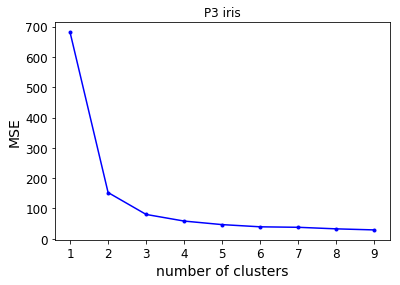

In [135]:
plt.plot(kcluster,mse_iris,"b.-")
plt.title('P3 iris')
plt.xlabel("number of clusters")
plt.ylabel("MSE")

In [149]:
Xdf=pd.read_csv('hw3/hw3_physio.csv')
X=np.array(Xdf.values[:,1:],dtype=np.float64)
print(X.shape)

(2242, 40)


In [143]:
def kmeans1(x):
    n_kcluster = 20
    kcluster = np.array([i for i in range(1, 20)])
    mses=[]
    for i,k in enumerate(kcluster):
        kmeans=cluster.MiniBatchKMeans(n_clusters=k,max_iter=100)
        kmeans.fit(x)
        mses.append(kmeans.inertia_)
    return mses

In [144]:
mse_physio = kmeans1(X)
kcluster = np.array([i for i in range(1, 20)])

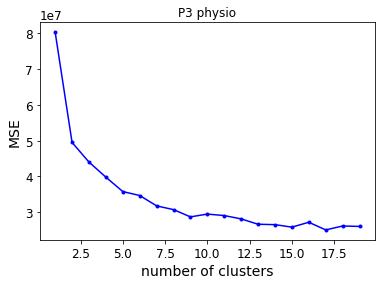

In [145]:
plt.plot(kcluster,mse_physio,"b.-")
plt.title('P3 physio')
plt.xlabel("number of clusters")
plt.ylabel("MSE")

(b)

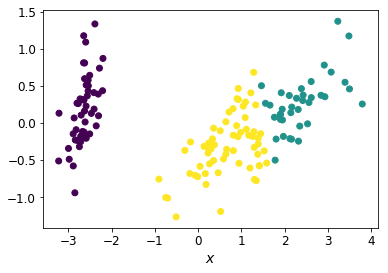

In [157]:
kmeans=cluster.MiniBatchKMeans(n_clusters=3,max_iter=100)
kmeans.fit(data)
labels=kmeans.labels_
# This section plots the data.
pca=decomposition.PCA(n_components=2)
pca.fit(data)
X=pca.transform(data)
fig=plt.figure(figsize=[6,4])
plt.scatter(X[:,0],X[:,1],c=labels)
plt.xlabel("$x$")
plt.axis('tight')
plt.show()

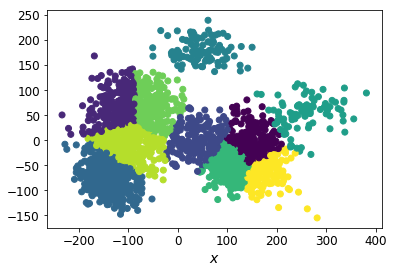

In [156]:
kmeans=cluster.MiniBatchKMeans(n_clusters=10,max_iter=100)
kmeans.fit(X)
labels=kmeans.labels_
# This section plots the data.
pca=decomposition.PCA(n_components=2)
pca.fit(X)
X=pca.transform(X)
fig=plt.figure(figsize=[6,4])
plt.scatter(X[:,0],X[:,1],c=labels)
plt.xlabel("$x$")
plt.axis('tight')
plt.show()

# P4

In [37]:
Xdf=pd.read_csv('hw3/hw3_physio.csv')
X=np.array(Xdf.values[:,1:],dtype=np.float64)
print(X.min(), X.max())
X = X/(max(abs(X.min()), abs(X.max())))

-280.05566349312784 280.4784201423917


In [38]:
from sklearn import decomposition, model_selection
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [39]:
n_components = 15
pca=decomposition.PCA(n_components=n_components)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

###### fig=plt.figure(figsize=[6,4])
plt.plot(np.arange(1,16),pca.explained_variance_ratio_[:15],'k.-',lw=2,ms=8,label='Individual')
plt.plot(np.arange(1,16),np.cumsum(pca.explained_variance_ratio_[:15]),'b.--',lw=2,ms=8, label='Cumulative')
plt.legend()
plt.xlabel('Component #')
plt.ylabel('% Variance Explained')
savepdf(fig,'pca_variance_explained')

 since we at less to maintain 80% of our variance, so choosing 6 components can meet the requirement
 

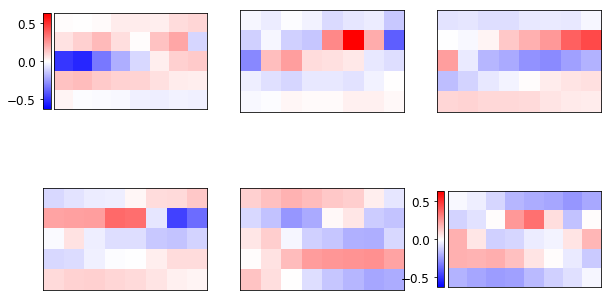

In [41]:
# visualize components
n_components = 6
fig=plt.figure(figsize=[10,6])
components=pca.components_
maxabs=np.max(np.abs(components[:n_components]))
for i,component in enumerate(components):
    if i>=n_components:
        continue
    ax=plt.subplot(2,3,i+1)
    image = np.reshape(component,[5,8])
    im=ax.imshow(image, cmap='bwr',vmin=-maxabs,vmax=maxabs)
    plt.xticks([])
    plt.yticks([])
    if (i%5)==0:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("left", size="5%", pad=0.05)
        #cb = mpl.colorbar.ColorbarBase(cax,orientation='vertical')
        h=plt.colorbar(im,cax=cax,orientation='vertical')
        cax.yaxis.set_ticks_position('left')
        cax.yaxis.set_label_position('left')
plt.show()

In [81]:
print(y)
print(X)

[ 1.  1.  1.  0.  1.  0.  1.  1.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.
  0.  0.  1.  1.  1.  1.  0.  0.  0.  0.  1.  0.  1.  1.  0.  0.  0.  1.
  1.  1.  1.  0.  1.  1.  1.  0.  1.  0.  1.  0.  0.  1.  0.  1.  1.  1.
  0.  1.  0.  1.  0.  0.  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  1.  1.
  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  1.  0.  1.  0.  0.  1.  0.  0.
  0.  0.  1.  0.  1.  1.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  1.  1.
  0.  0.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  0.  0.  0.  0.  1.  1.
  1.  0.  0.  1.  1.  0.  1.  0.  1.  1.  1.  0.  0.  1.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  1.  1.  1.  1.  0.  1.  1.  0.  0.  0.  1.  0.  0.  1.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  1.
  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.  1.  1.
  0.  0.  1.  1.  1.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  1.
  0.  0.  1.  0.  1.  1.  1.  1.  1.  0.  1.  0.  1

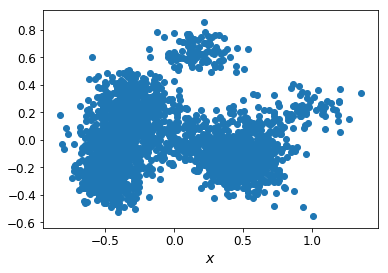

In [84]:
pca=decomposition.PCA(n_components=2)
pca.fit(X)
X_new=pca.transform(X)
# This section plots the data.
fig=plt.figure(figsize=[6,4])
plt.scatter(X_new[:,0],X_new[:,1])
plt.xlabel("$x$")
plt.axis('tight')
plt.show()
# this is simply so that we can show you the saved file.
# We don't really need this figure saved...
savepdf(fig,'Data with Two components') 

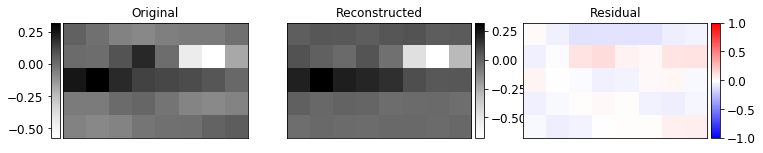

In [129]:
# visualize data after embedding top 2 principle components
pca=decomposition.PCA(n_components=2)
pca.fit(X)
i = 20
x = X[i]
# Show the original image
fig=plt.figure(figsize=[12,5])
ax=plt.subplot(1,3,1)
image = np.reshape(x,[5,8])
im=ax.imshow(image, cmap='Greys')
plt.title('Original')
plt.xticks([])
plt.yticks([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="5%", pad=0.05)
#cb = mpl.colorbar.ColorbarBase(cax,orientation='vertical')
h=plt.colorbar(im,cax=cax,orientation='vertical')
cax.yaxis.set_ticks_position('left')
cax.yaxis.set_label_position('left')
# Project to PCA and back to get the reconstruction
ax=plt.subplot(1,3,2)
image = np.reshape(pca.inverse_transform(pca.transform(x.reshape(1,-1))),[5,8])
im=ax.imshow(image, cmap='Greys')
plt.title('Reconstructed')
plt.xticks([])
plt.yticks([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
h=plt.colorbar(im,cax=cax,orientation='vertical')
# Project to PCA and back to get the residual
ax=plt.subplot(1,3,3)
image = np.reshape(x-pca.inverse_transform(pca.transform(x.reshape(1,-1))),[5,8])
im=ax.imshow(image, cmap='bwr', vmin=-1,vmax=1)
plt.title('Residual')
plt.xticks([])
plt.yticks([])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
#cb = mpl.colorbar.ColorbarBase(cax,orientation='vertical')
h=plt.colorbar(im,cax=cax,orientation='vertical')
cax.yaxis.set_ticks_position('right')
cax.yaxis.set_label_position('right')

Text(0, 0.5, 'reconstruction error')

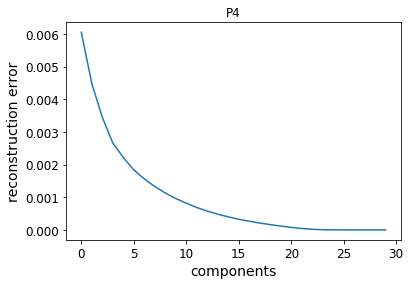

In [130]:
# error plot
n=30
errors=np.zeros(n)
for k in range(n):
    pca=decomposition.PCA(n_components= k+1)
    pca.fit(X)
    X_projected=pca.inverse_transform(pca.transform(X))
    error = ((X - X_projected) ** 2).mean()#????
    errors[k]=error
plt.plot(errors)
plt.title('P4 reconstruction errors vs number of components')
plt.xlabel("components")
plt.ylabel("reconstruction error")

# P5

In [15]:
from sklearn import metrics, model_selection

Xdf=pd.read_csv('hw3/hw3_problem_5_X.csv')
ydf=pd.read_csv('hw3/hw3_problem_5_y.csv')
Xdf_blind=pd.read_csv('hw3/hw3_problem_5_X_blind.csv')
X=np.array(Xdf.values[:,1:],dtype=np.float64)
y=np.array(ydf.values[:,1],dtype=np.float64)
X_blind=np.array(Xdf_blind.values[:,1:],dtype=np.float64)
print(X.shape)

(375, 200)


In [16]:
X_train,X_valid,y_train,y_valid=model_selection.train_test_split(X,y,random_state=42)

In [17]:
pca=decomposition.PCA(n_components=100)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

NameError: name 'savepdf' is not defined

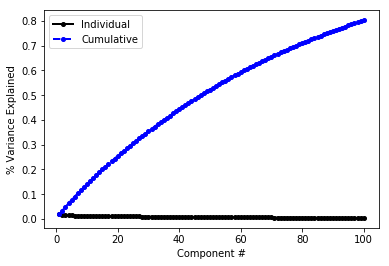

In [18]:
fig=plt.figure(figsize=[6,4])
plt.plot(np.arange(1,101),pca.explained_variance_ratio_[:100],'k.-',lw=2,ms=8,label='Individual')
plt.plot(np.arange(1,101),np.cumsum(pca.explained_variance_ratio_[:100]),'b.--',lw=2,ms=8, label='Cumulative')
plt.legend()
plt.xlabel('Component #')
plt.ylabel('% Variance Explained')
savepdf(fig,'pca_variance_explained')

In [19]:
from sklearn import decomposition, svm, pipeline, model_selection

In [20]:
pca = decomposition.PCA(n_components=200)

In [21]:
n_components=np.array([i+1 for i in range(10)])
gamma=np.logspace(-4, 0, 30)
C = np.logspace(-10, 2, 30)

cls=svm.SVC(kernel='rbf',gamma=0.1,C=0.1)
pipe=pipeline.Pipeline([('pca',pca),('cls',cls)])
pipe.fit(X_train, y_train)
# print(pipe.get_params().keys())

params = {'pca__n_components': n_components, 'cls__gamma': gamma, 'cls__C': C}
clf = model_selection.GridSearchCV(pipe, params, scoring='roc_auc', cv=5,iid=False, return_train_score=False)
clf.fit(X, y)
print('...done')

...done


In [22]:
# get the best parameters
print(clf.best_params_,clf.best_score_)

{'cls__C': 2.21221629107045, 'cls__gamma': 0.0001, 'pca__n_components': 10} 0.7533390731451673


In [43]:
# predict on blind dataset
n_components = 10
gamma = 0.0001
C = 2.21221629107045
pca_model=decomposition.PCA(n_components=n_components)
cls_model=svm.SVC(kernel='rbf',gamma=gamma,C=C)
pipe=pipeline.Pipeline([('pca',pca_model),('cls',cls_model)])
pipe.fit(X_train, y_train)

y_blind_predicted = pipe.predict(X_blind)
Xdf=pd.DataFrame(y_blind_predicted)
Xdf.to_csv('./answers/hw3_problem_5_y_blind_predicted.csv')